# Logistic Regression: 
## Predict whether a person makes over 50K per year using the Census Income Data Set

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

df = pd.read_csv("/Users/zhanebennett/Downloads/Adult//adult.data", header=None)
df.head(8)     # with this command you can see your file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [120]:


df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [121]:
age = df['age']
age.head()
income = df['income']
income.head(2)

0     <=50K
1     <=50K
Name: income, dtype: object

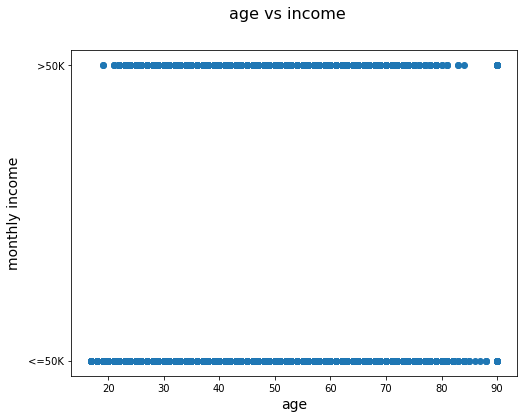

In [122]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs income', fontsize=16)
plt.scatter(age, income);
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show();

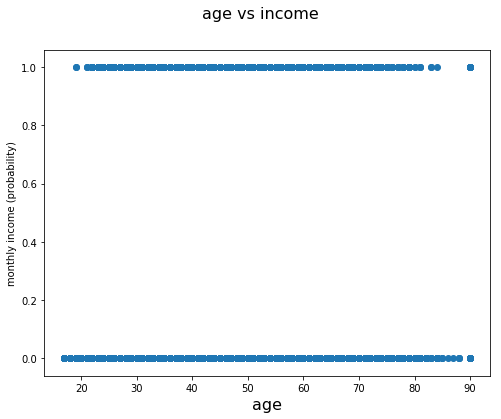

In [123]:
income_bin = income == " >50K"
income_bin = income_bin.astype(int)
income_bin.head()
fig = plt.figure(figsize=(8,6))
fig.suptitle("age vs income", fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income (probability)");

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

regr = LogisticRegression(C=1e5)
age = age.values  #turns series object into an array object
age = age.reshape(-1, 1)
regr.fit(age, income_bin)


/Users/zhanebennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

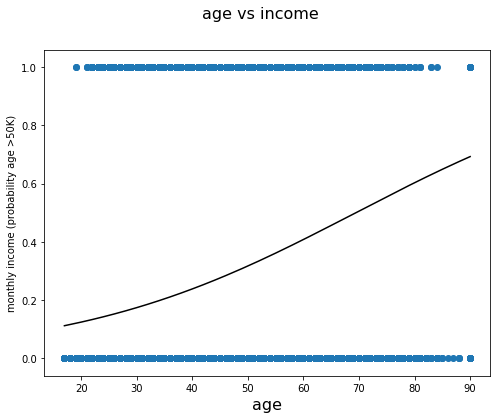

In [125]:
coef = regr.coef_
interc = regr.intercept_

lin_pred = (age * coef + interc)    #linear prefictor
mod_income = 1 / ( 1+ np.exp(-lin_pred))  #log transformation
age_ordered, mod_income_ordered = zip(*sorted(zip(age, mod_income.ravel()), key=lambda x:x[0]))

fig = plt.figure(figsize=(8,6))
fig.suptitle("age vs income", fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income (probability age >50K)");
plt.plot(age_ordered, mod_income_ordered, c="black")
plt.show()